# GEOG5995M Final Assignment

Student ID number: 201770542

# How economy activity status influence the migration of student in England and Wales

# 1. Introduction
This research project embarks on an exploratory analysis of the intricate relationship between economic activity status and student migration patterns within England and Wales. Motivated by the growing significance of student mobility in contemporary urban and regional planning, the study aims to unravel the complex dynamics that underpin these migration flows. The focus is particularly placed on English Lower Tier Local Authorities (LTLAs) as the unit of analysis, offering a detailed and localized perspective on the phenomenon.

Utilizing boundary data from the UK Data Service, the project delves into an in-depth analysis of various economic indicators and their potential influence on the migration decisions of students. This approach is grounded in the hypothesis that economic status within specific regions will significantly sways the migratory trends among the student population. The investigation employs a robust methodological framework, leveraging Python's data processing capabilities, coupled with geospatial analysis and advanced visualization techniques, to dissect and interpret the intricate patterns that emerge.

# 2. Data import and cleaning
## 2.1. UK shape file

The boundary data for England were obtained from the UK Data Service <a href="#ref1">[1]</a>. For the purpose of aligning with the dataset, the English Lower Tier Local Authorities (LTLA) were specifically chosen as the geographical unit of analysis.

### Data Cleaning

In [1]:
# read required packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import LineString

In [2]:
# Import data
UK_shape = gpd.read_file('England and Wales LTLAs 2022/ew_ltla_2022.shp')

In [3]:
# Check projection
UK_shape.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [4]:
# Check if the null value exists
UK_shape.isnull().sum()

label          0
ltla22cd       0
ltla22nm       0
ltla22nmw    309
name           0
geometry       0
dtype: int64

In [5]:
# Drop the null column
UK_shape = UK_shape.drop(columns=['ltla22nmw'])
UK_shape.head()

,label,ltla22cd,ltla22nm,name,geometry
0,K04000001E92000001E12000006E07000147,E07000147,North Norfolk,North Norfolk,"MULTIPOLYGON (((590220.813 325761.812, 590218...."
1,K04000001E92000001E12000009E06000027,E06000027,Torbay,Torbay,"POLYGON ((287810.312 57915.000, 287782.906 579..."
2,K04000001E92000001E12000001E08000023,E08000023,South Tyneside,South Tyneside,"POLYGON ((431090.323 562390.254, 431107.515 56..."
3,K04000001E92000001E12000008E07000211,E07000211,Reigate and Banstead,Reigate and Banstead,"POLYGON ((523411.094 148006.500, 523398.554 14..."
4,K04000001E92000001E12000009E06000054,E06000054,Wiltshire,Wiltshire,"POLYGON ((384752.625 128483.133, 384707.000 12..."


### Primary data visualsation

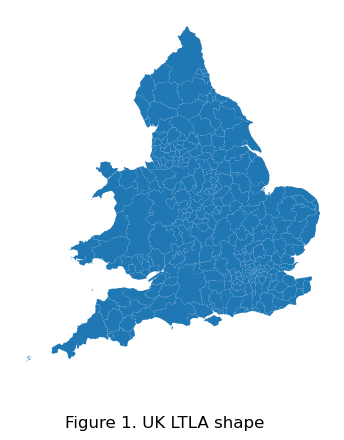

In [6]:
# Plot the LTLA UK shapes
fig, ax = plt.subplots()
UK_shape.plot(ax=ax)

# Remove the box (axis lines and labels)
ax.set_axis_off()

# Add title
plt.figtext(0.5, 0.01, "Figure 1. UK LTLA shape", ha="center", fontsize=12)

plt.show()

## 2.2. Economic activity status (EAS)

Economic activity serves as an indicator of economic conditions <a href="#ref2">[2]</a>, which may influence patterns of student migration. The dataset under consideration provides estimates from the 2021 Census, categorizing usual residents in England and Wales, aged 16 and over, based on their economic activity status <a href="#ref3">[3]</a>. This classification encompasses three primary categories: those who are economically active and employed, those who are economically active but unemployed, and those who are economically inactive. In this study, the proportion of economically active individuals is utilized as a measure of local economic health. For comparative purposes, the dataset also includes economic activity data from the 2011 Census.

In 2021, among the 48.6 million usual residents in England and Wales aged 16 and over, approximately 27.8 million (57.2%) were employed, 1.7 million (3.4%) were unemployed, and 19.1 million (39.4%) were not economically active <a href="#ref3">[3]</a>.

### Data Cleaning

In [7]:
# Import the economic acitivity status data
eas = pd.read_csv("Employment.csv")

In [8]:
# Check the economic activity data
eas.head()

,ltla22cd,2011,2021,change
0,E06000001,51.1,50.5,-0.5
1,E06000002,49.6,49.5,0.0
2,E06000003,51.0,49.5,-1.5
3,E06000004,56.6,54.7,-1.9
4,E06000005,57.7,56.0,-1.7


In [9]:
# Check if the null value exists
eas.isnull().sum()

ltla22cd    0
2011        0
2021        0
change      0
dtype: int64

### Primary data visualsation

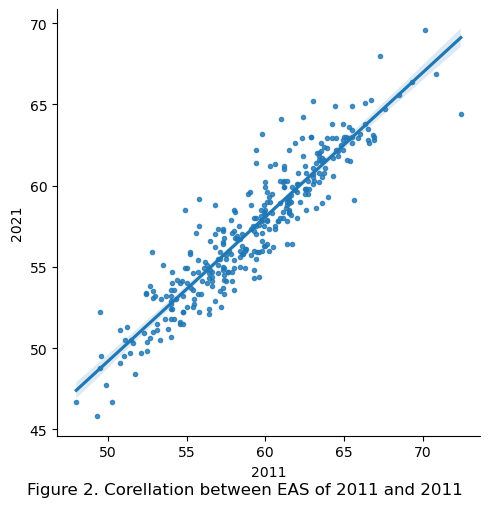

In [10]:
# Data visualsation of data pattern of 2011 and 2021
sns.lmplot(x="2011", y="2021", data=eas, markers='.')

# Add title
plt.figtext(0.5, 0.00, "Figure 2. Corellation between EAS of 2011 and 2011", ha="center", fontsize=12)

plt.show()

### Spatial Data Visualisation

In [11]:
# Merge the economy activity data with geographical data
EAS_UK = pd.merge(UK_shape, eas, on='ltla22cd', how='left')
EAS_UK.head()

,label,ltla22cd,ltla22nm,name,geometry,2011,2021,change
0,K04000001E92000001E12000006E07000147,E07000147,North Norfolk,North Norfolk,"MULTIPOLYGON (((590220.813 325761.812, 590218....",50.3,46.7,-3.5
1,K04000001E92000001E12000009E06000027,E06000027,Torbay,Torbay,"POLYGON ((287810.312 57915.000, 287782.906 579...",52.5,50.4,-2.2
2,K04000001E92000001E12000001E08000023,E08000023,South Tyneside,South Tyneside,"POLYGON ((431090.323 562390.254, 431107.515 56...",53.1,51.5,-1.5
3,K04000001E92000001E12000008E07000211,E07000211,Reigate and Banstead,Reigate and Banstead,"POLYGON ((523411.094 148006.500, 523398.554 14...",64.8,62.5,-2.2
4,K04000001E92000001E12000009E06000054,E06000054,Wiltshire,Wiltshire,"POLYGON ((384752.625 128483.133, 384707.000 12...",63.4,60.2,-3.2


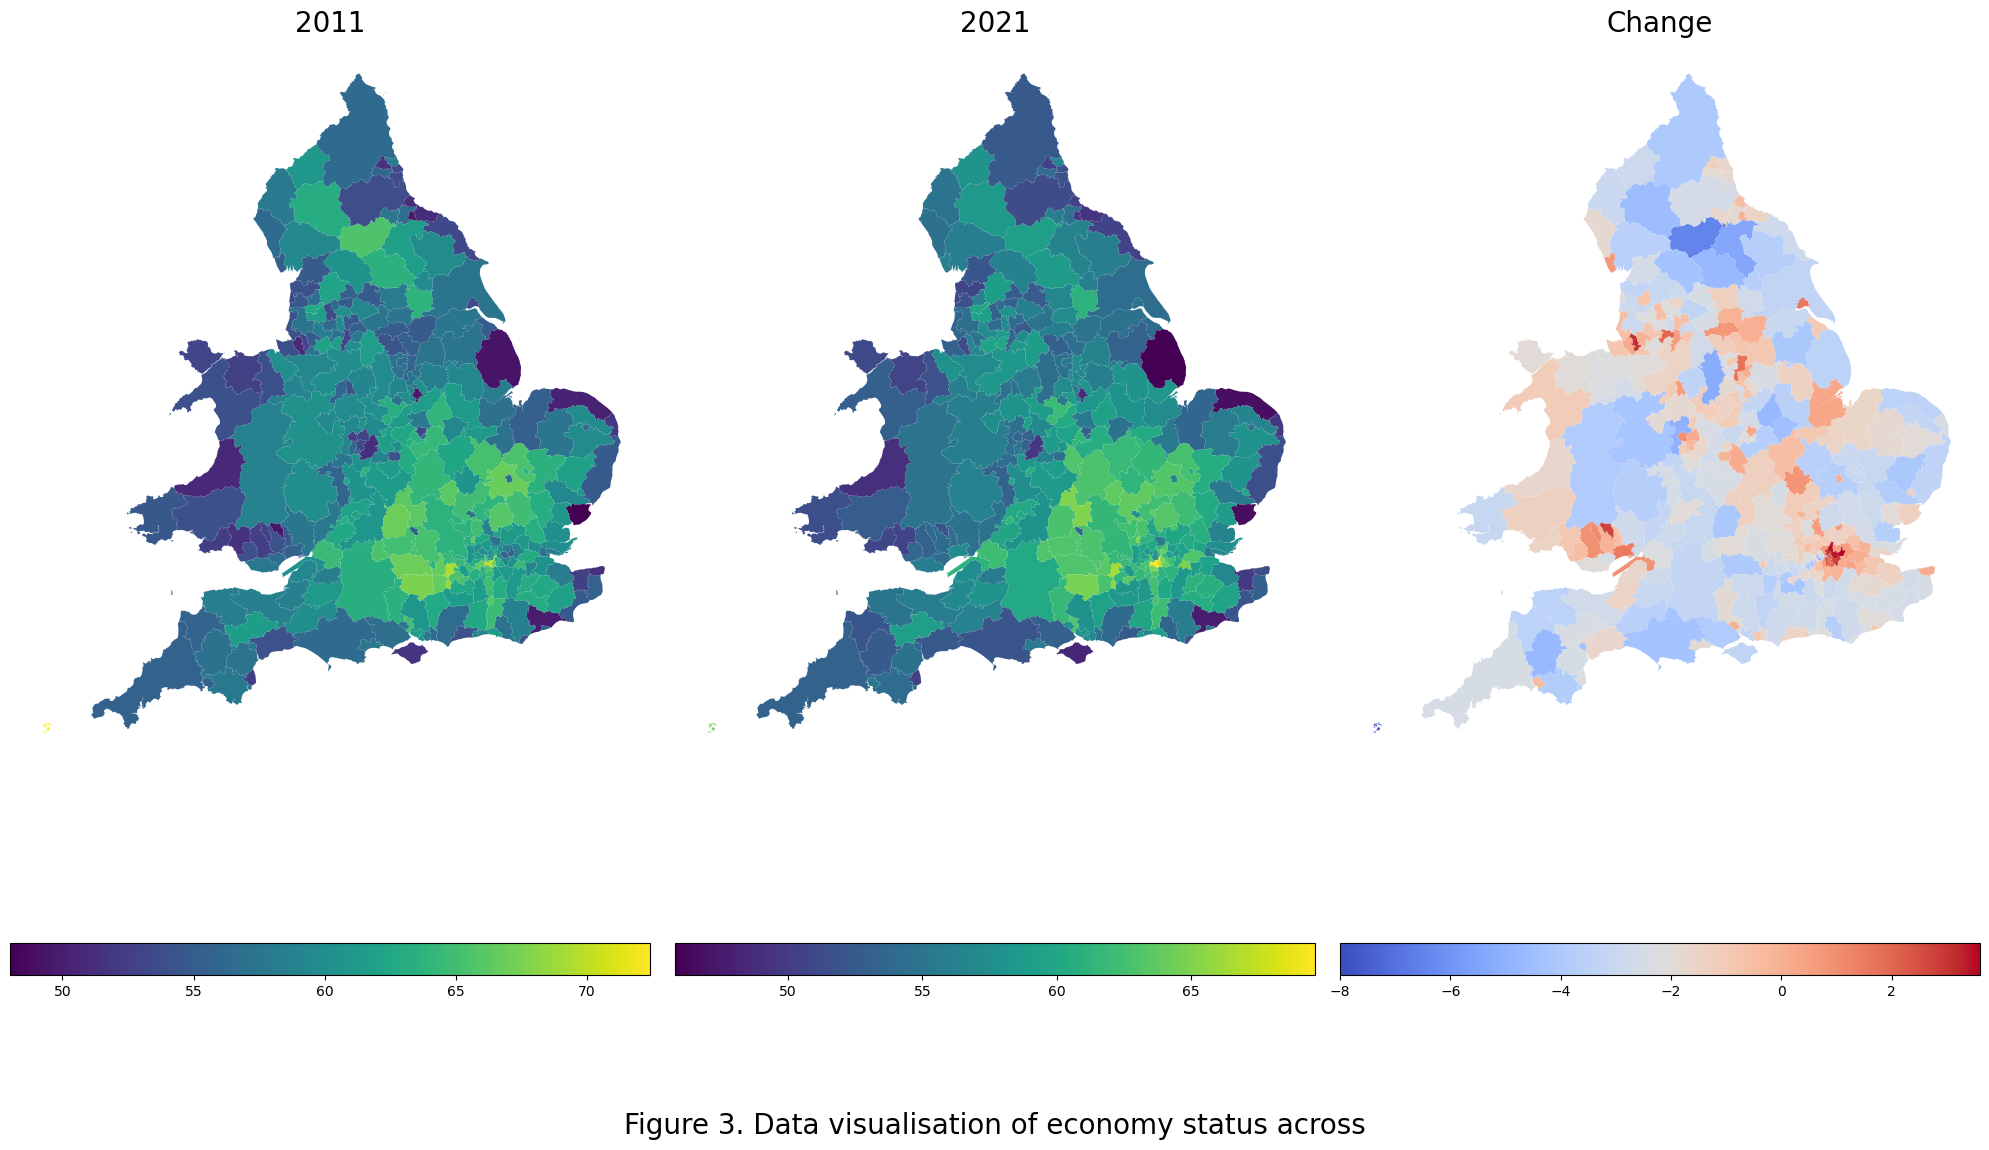

In [12]:
# Data visualisation of economy status across UK in 2011, 2021 and change between them

fig, axes = plt.subplots(1, 3, figsize=(20, 12))  

# 2011
EAS_UK.plot(column='2011', ax=axes[0], legend=True, legend_kwds={'orientation': "horizontal"})
axes[0].set_title('2011', fontsize=20)
axes[0].set_axis_off()  

# 2021
EAS_UK.plot(column='2021', ax=axes[1], legend=True, legend_kwds={'orientation': "horizontal"})
axes[1].set_title('2021', fontsize=20)
axes[1].set_axis_off()  

# change
EAS_UK.plot(column='change', ax=axes[2], legend=True, cmap='coolwarm', legend_kwds={'orientation': "horizontal"})
axes[2].set_title('Change', fontsize=20)
axes[2].set_axis_off() 

# Add title
plt.figtext(0.5, 0.0, "Figure 3. Data visualisation of economy status across", ha="center", fontsize=20)

# Set intensive layout
plt.tight_layout()

plt.show()

## 2.3. Student Flow data
The dataset employed in this study offers estimates from the 2021 Census regarding usual residents of England and Wales, aged 16 and over, who resided at a different address one year prior to the Census <a href="#ref4">[4]</a>. This previous address was either a student term-time location or a boarding school address within the UK. The data categorizes these individuals based on their relocation from one Lower Tier Local Authority (LTLA) area to another, comparing their location one year before the Census with their current LTLA residence as of Census Day, 21 March 2021.

Census flow data, also known as interaction data, pertain to the movement of people between different places. This encompasses frequent short-distance movements, such as daily commutes, as well as less frequent, potentially longer-distance relocations, including migration to a new residence or extended stays at a secondary address. Unlike other Census data, flow data uniquely connect two points: an origin and a destination. Consequently, flow datasets can spatially show how people migrate.

### Data Cleaning

In [13]:
# Import the flow data
flow = pd.read_csv("ODST01EW_LTLA.csv")

In [14]:
# Check the flow data
flow.head()

,Migrant LTLA one year ago code,Migrant LTLA one year ago label,Lower tier local authorities code,Lower tier local authorities label,Count
0,E06000001,Hartlepool,E06000001,Hartlepool,88
1,E06000001,Hartlepool,E06000002,Middlesbrough,3
2,E06000001,Hartlepool,E06000003,Redcar and Cleveland,1
3,E06000001,Hartlepool,E06000004,Stockton-on-Tees,4
4,E06000001,Hartlepool,E06000005,Darlington,2


In [15]:
# Check if the null value exists
flow.isnull().sum()

Migrant LTLA one year ago code        0
Migrant LTLA one year ago label       0
Lower tier local authorities code     0
Lower tier local authorities label    0
Count                                 0
dtype: int64

# 3. Statistical modelling
This study employs two statistical models for its analysis: Ordinary Least Squares (OLS) and Geographically Weighted Regression (GWR). OLS, a widely used method within the Geographic Information System (GIS) framework, is utilized to model spatial relationships in the context of student migration. However, OLS assumes spatial homogeneity, overlooking spatial heterogeneity, which may limit its descriptive and predictive capabilities <a href="#ref5">[5]</a>. To address this limitation, the study incorporates GWR, which accounts for spatial heterogeneity by allowing variable associations at different spatial locations to capture spatial variations  <a href="#ref6">[6]</a>. Consequently, both OLS and GWR are applied in this research to explore the spatial relationships between economic activity status and student migration.

## 3.1. Ordinary Least Square (OLS)
To investigate the relationship between economic activity status and student migration, this study employs Ordinary Least Squares (OLS) as the statistical method of analysis. OLS predicts the values of a continuous response variable using one or more explanatory variables.

### Data cleaning

In [16]:
# Read required packages
import statsmodels.api as sm

In [17]:
# Create a dataset for regression
ols = EAS_UK[['name', 'ltla22cd', '2021', 'geometry']]
ols = gpd.GeoDataFrame(ols, geometry='geometry')
ols.head()

,name,ltla22cd,2021,geometry
0,North Norfolk,E07000147,46.7,"MULTIPOLYGON (((590220.813 325761.812, 590218...."
1,Torbay,E06000027,50.4,"POLYGON ((287810.312 57915.000, 287782.906 579..."
2,South Tyneside,E08000023,51.5,"POLYGON ((431090.323 562390.254, 431107.515 56..."
3,Reigate and Banstead,E07000211,62.5,"POLYGON ((523411.094 148006.500, 523398.554 14..."
4,Wiltshire,E06000054,60.2,"POLYGON ((384752.625 128483.133, 384707.000 12..."


In [18]:
# Calculating student flow counts
summed_counts = flow.groupby('Lower tier local authorities code')['Count'].sum()
summed_counts = summed_counts.reset_index()
summed_counts.head()

,Lower tier local authorities code,Count
0,E06000001,177
1,E06000002,750
2,E06000003,151
3,E06000004,283
4,E06000005,180


In [19]:
# Merge the economy activity status data with student flow data
ols = pd.merge(ols, summed_counts, right_on='Lower tier local authorities code', left_on='ltla22cd')
ols.head()

,name,ltla22cd,2021,geometry,Lower tier local authorities code,Count
0,North Norfolk,E07000147,46.7,"MULTIPOLYGON (((590220.813 325761.812, 590218....",E07000147,149
1,Torbay,E06000027,50.4,"POLYGON ((287810.312 57915.000, 287782.906 579...",E06000027,268
2,South Tyneside,E08000023,51.5,"POLYGON ((431090.323 562390.254, 431107.515 56...",E08000023,139
3,Reigate and Banstead,E07000211,62.5,"POLYGON ((523411.094 148006.500, 523398.554 14...",E07000211,393
4,Wiltshire,E06000054,60.2,"POLYGON ((384752.625 128483.133, 384707.000 12...",E06000054,1259


In [20]:
# Drop repetitive column
ols = ols.drop(columns=['Lower tier local authorities code'])
ols.head()

,name,ltla22cd,2021,geometry,Count
0,North Norfolk,E07000147,46.7,"MULTIPOLYGON (((590220.813 325761.812, 590218....",149
1,Torbay,E06000027,50.4,"POLYGON ((287810.312 57915.000, 287782.906 579...",268
2,South Tyneside,E08000023,51.5,"POLYGON ((431090.323 562390.254, 431107.515 56...",139
3,Reigate and Banstead,E07000211,62.5,"POLYGON ((523411.094 148006.500, 523398.554 14...",393
4,Wiltshire,E06000054,60.2,"POLYGON ((384752.625 128483.133, 384707.000 12...",1259


### First OLS regression

In [21]:
# predict student inflow by economy activity status in 2021

# define X and y
X = ols["2021"] # explanatory variable
y = ols["Count"] # dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Count   R-squared (uncentered):                   0.200
Model:                            OLS   Adj. R-squared (uncentered):              0.197
Method:                 Least Squares   F-statistic:                              82.43
Date:                Tue, 21 Nov 2023   Prob (F-statistic):                    1.02e-17
Time:                        16:12:21   Log-Likelihood:                         -2992.8
No. Observations:                 331   AIC:                                      5988.
Df Residuals:                     330   BIC:                                      5991.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2021          17.7703      1.957      9.079      0.000      13.920      21.621
==============================================================================
Omnibus:                      289.481   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4280.595
Skew:                           3.803   Prob(JB):                         0.00
Kurtosis:                      18.891   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### First OLS model result analysis
The initial outcomes of the Ordinary Least Squares (OLS) regression model indicate suboptimal model performance, as evidenced by an Akaike Information Criterion (AIC) value of 5988 and a Bayesian Information Criterion (BIC) of 5991. To enhance the robustness and predictive accuracy of the model, a thorough re-examination of input data is recommended, followed by the implementation of an adjusted model based on this refined dataset.

### OLS model refinement

/var/folders/_7/njcd8_r91s989567749w9b9r0000gn/T/ipykernel_16235/3715900475.py:7: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.gca().locator_params(nbins=20)


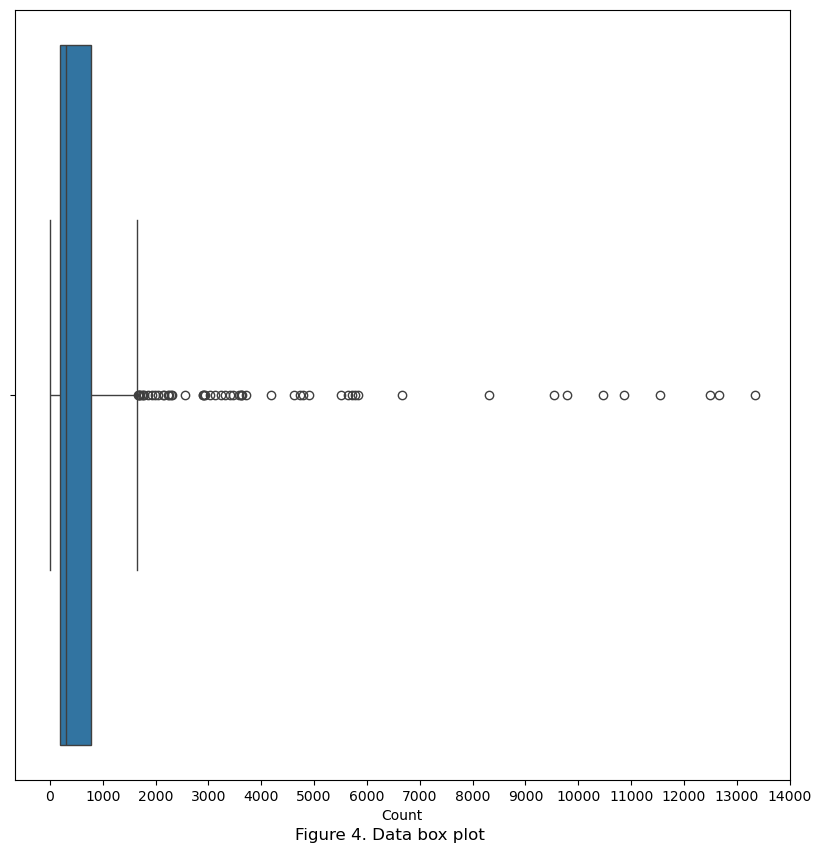

In [22]:
# Construct a box plot for data examination
fig, ax = plt.subplots(figsize=(10, 10))

sns.boxplot(x=ols['Count'], ax=ax)

# Adjust the x axis
plt.gca().locator_params(nbins=20) 

# Add title
plt.figtext(0.5, 0.05, "Figure 4. Data box plot", ha="center", fontsize=12)

plt.show()

### Adjust the dataset
Figure 4 reveals the presence of numerous outliers within the dataset. Consequently, data points exceeding a count of 1000 were excluded to refine the analytical model.

### Rerun the adjusted OLS model

In [23]:
# Create new dataset for regression
olsn = ols[ols['Count'] <= 1000]

In [24]:
# predict student inflow by economy activity status in 2021

# define X and y
X = olsn["2021"] # explanatory variable
y = olsn["Count"] # dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Count   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                              653.1
Date:                Tue, 21 Nov 2023   Prob (F-statistic):                    7.04e-73
Time:                        16:12:21   Log-Likelihood:                         -1751.9
No. Observations:                 261   AIC:                                      3506.
Df Residuals:                     260   BIC:                                      3509.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2021           5.4809      0.214     25.555      0.000       5.059       5.903
==============================================================================
Omnibus:                       64.567   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.437
Skew:                           1.394   Prob(JB):                     2.84e-24
Kurtosis:                       4.482   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS model result analysis
The OLS regression results indicate that economy activity status  significantly explains the variation in the student flow in 2021, as evidenced by an R-squared of 0.715 and an adjusted R-squared of 0.714. The model's statistical significance is further supported by a high F-statistic (653.1). The coefficient is 5.4809 with p value under 0.001, suggesting a strong positive relationship between economy activity status and student flow in 2021 . The model's overall fit and predictor significance are also confirmed by a low standard error (0.214) and a high t-statistic (25.555). 

### Visual Model evaluation

#### Plot actual versus predicted values

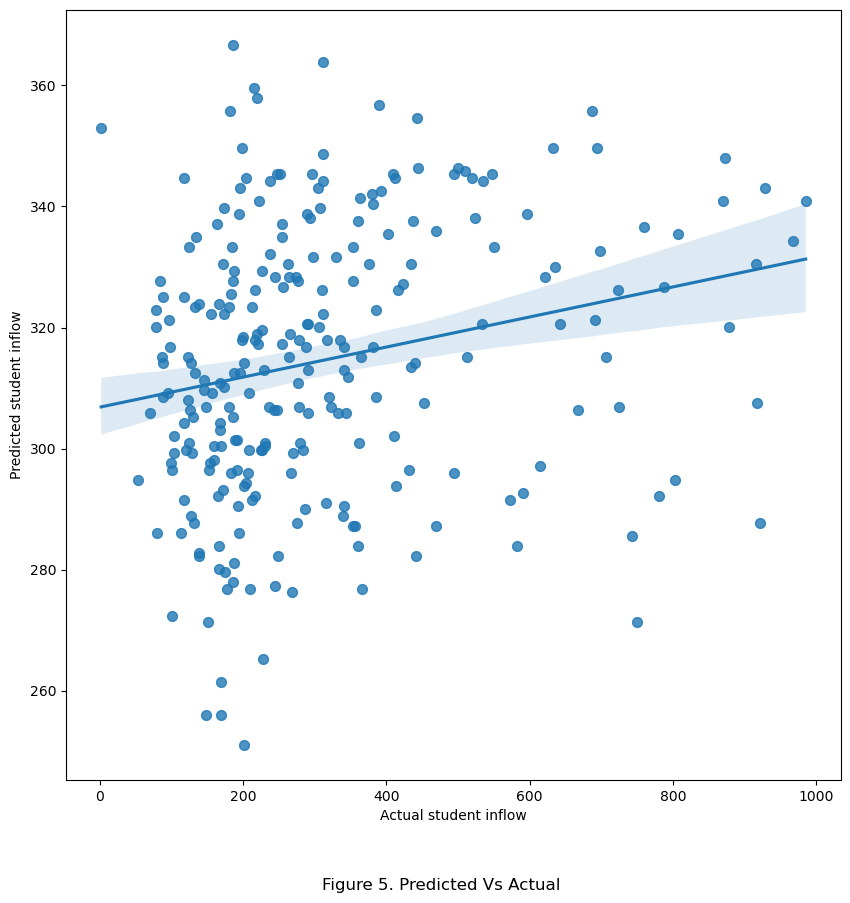

In [25]:
fig, ax = plt.subplots(figsize=(10,10))

# Scatter plot
sns.regplot(x=olsn['Count'], y=model.fittedvalues, scatter_kws={'s': 50})


# label title and axis
ax.set_xlabel('Actual student inflow')
ax.set_ylabel('Predicted student inflow');

# Add title
plt.figtext(0.5, 0, "Figure 5. Predicted Vs Actual", ha="center", fontsize=12)

plt.show()

#### Residual plot

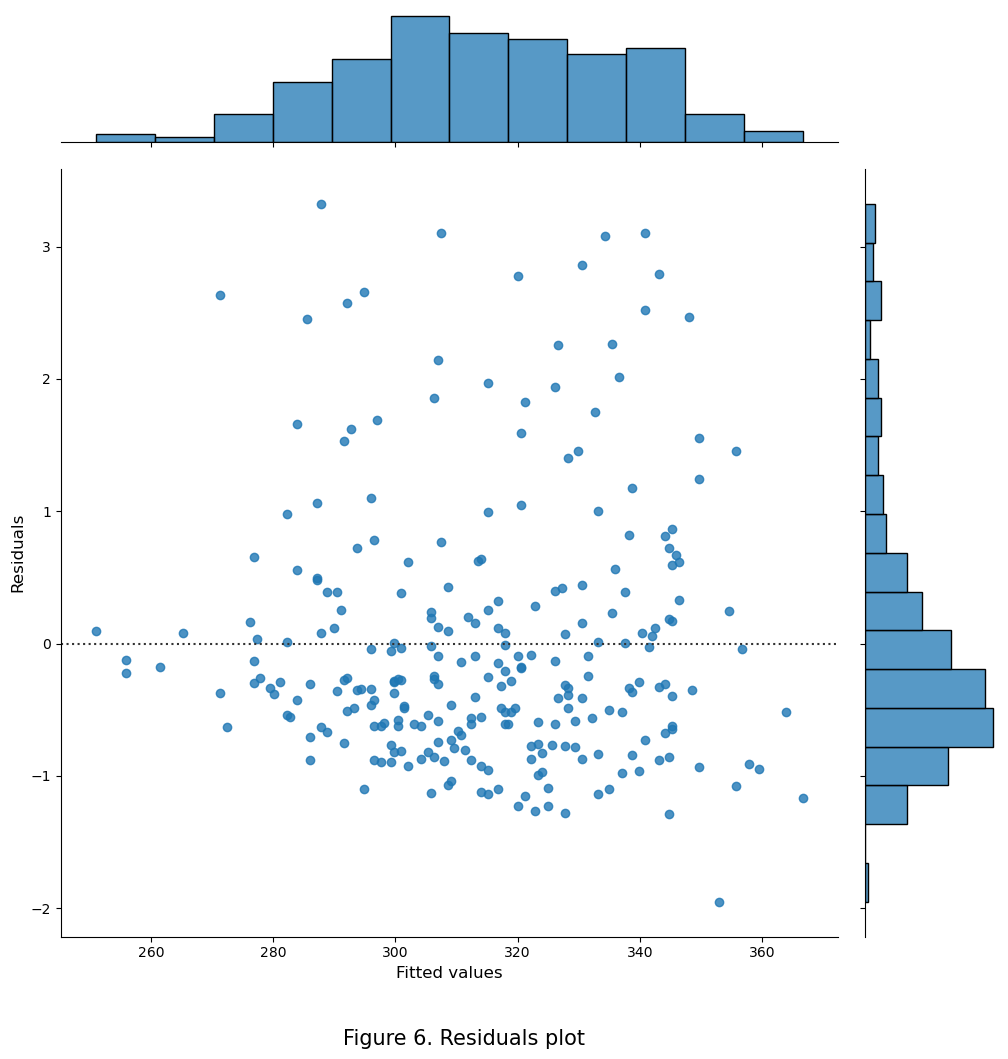

In [26]:
# Plot residuals plot

g =sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='resid',height=10)

g.set_axis_labels('Fitted values', 'Residuals', fontsize=12);

# Add title
plt.figtext(0.45, -0.05, "Figure 6. Residuals plot", ha="center", fontsize=15)

plt.show()

## 3.2. Geographically Weighted Regression (GWR)
Geographically Weighted Regression (GWR) is a method designed to examine relationships that exhibit spatial variation and to yield localized regression results. Unlike global regression approaches, GWR generates local coefficients by assigning greater weight to neighboring observations, taking into account the geographical positions of shape centroids<a href="#ref7">[7]</a>. This technique is particularly valuable in addressing spatial non-stationarity in the relationships between response and explanatory variables.

Note: You are required to use code 'pip install mgwr' to run following codes.

In [27]:
# Read required packages
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
import numpy as np

In [28]:
# Read required packages
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
import numpy as np

# Generate dataset
gwr = olsn.copy()

# Set GWR model
gwr['constant'] = 1  # Add a constant term
y = gwr['Count'].values.reshape((-1,1))
X = gwr[['2021', 'constant']].values

# Extract the coordinates of centroids
gwr['centroid'] = olsn.geometry.centroid
u = gwr['centroid'].x
v = gwr['centroid'].y
coords = list(zip(u, v))

# Select bandwidth
bw = Sel_BW(coords, y, X).search()

# Fit the GWR model
gwr_model = GWR(coords, y, X, bw).fit()

# Output results
print(gwr_model.summary())

Model type                                                         Gaussian
Number of observations:                                                 261
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                       10195919.298
Log-likelihood:                                                   -1750.117
AIC:                                                               3504.233
AICc:                                                              3506.326
BIC:                                                           10194478.087
R2:                                                                   0.051
Adj. R2:                                                              0.047

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

### GWR result analysis

The GWR analysis reveals contrasting results between the Ordinary Least Square (OLS) and Geographically Weighted Regression (GWR) approaches. The OLS model shows a relatively low explanatory power with an AIC of 3506, but the AIC for the GWR model is 3489, suggesting a better fit to the data when accounting for spatial variation. The mean estimate for X1 (independent variable) in the GWR model is 1.234, with a wide range of values between -32.551 and 35.669. This variability in the GWR estimates reflects the spatial heterogeneity captured by the model, which is not accounted for in the global regression.

# 4. Data Visualisation
## 4.1. Non-spatial data visualisation
To visually interpret the results, a series of plots are created using matplotlib and seaborn. These include a map showing spatial variation in GWR coefficients, a box plot, a histogram for distribution, and two scatter plots. This visual representation aids in understanding the spatial heterogeneity in the relationship between student migration and economic activity status. Additionally, scatter plots are used to explore the relationships between student migration and economic activity status, and between student migration and GWR coefficients, providing insights into how student inflow correlates with economic activity status and the spatial variability captured by the GWR model. This approach ensures a spatial analysis combined with statistical visualisation to enhance understanding of the underlying patterns and relationships.

/var/folders/_7/njcd8_r91s989567749w9b9r0000gn/T/ipykernel_16235/469098643.py:22: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.gca().locator_params(nbins=20)


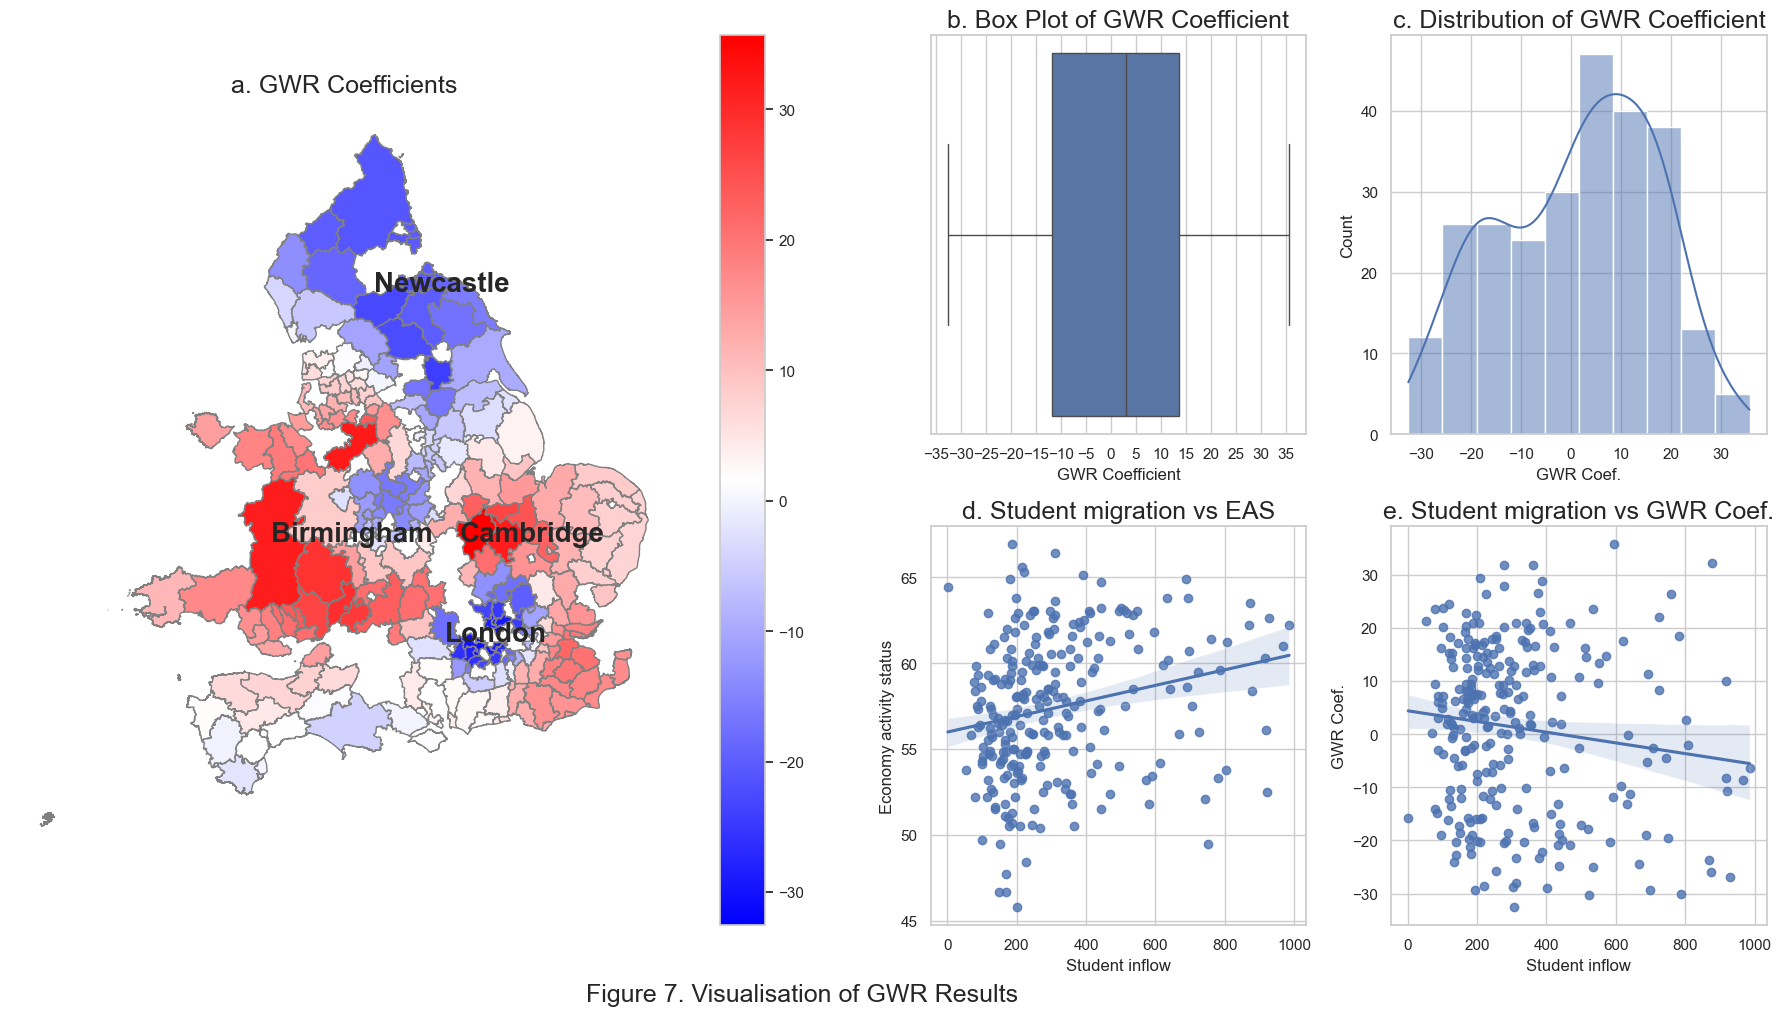

In [29]:
# Read required packages
from matplotlib.gridspec import GridSpec

# Set chart style
sns.set(style="whitegrid")

# Create figure and GridSpec layout
fig = plt.figure(figsize=(18, 10))
gs = GridSpec(2, 4, figure=fig)

# Map showing GWR Coefficients
ax1 = fig.add_subplot(gs[:, :2])  # Subplot spanning two rows and two columns
gwr_coefficients = gwr_model.params
gwr['gwr_coef'] = gwr_coefficients[:, 1]  
gwr.plot(column='gwr_coef', ax=ax1, legend=True, cmap='bwr', edgecolor='grey')
ax1.set_title('a. GWR Coefficients', fontsize=18)
ax1.axis('off')  # Hide axis

# Box plot of GWR Coefficients
ax2 = fig.add_subplot(gs[0, 2])
sns.boxplot(x=gwr['gwr_coef'], ax=ax2)
plt.gca().locator_params(nbins=20) 
# Set label
ax2.set_xlabel('GWR Coefficient');
ax2.set_title('b. Box Plot of GWR Coefficient', fontsize=18)

# Histogram showing the distribution of GWR Coefficients
ax3 = fig.add_subplot(gs[0, 3])
sns.histplot(gwr['gwr_coef'], kde=True, ax=ax3)
# Set label
ax3.set_xlabel('GWR Coef.')
ax3.set_ylabel('Count');
ax3.set_title('c. Distribution of GWR Coefficient', fontsize=18)

# Scatter plot showing the relationship between Count and 2021
ax4 = fig.add_subplot(gs[1, 2])
sns.regplot(x='Count', y='2021', data=gwr, ax=ax4)
# Set label
ax4.set_xlabel('Student inflow')
ax4.set_ylabel('Economy activity status');
ax4.set_title('d. Student migration vs EAS', fontsize=18)

# Scatter plot showing the relationship between Count and GWR Coefficient
ax5 = fig.add_subplot(gs[1, 3])
sns.regplot(x='Count', y='gwr_coef', data=gwr, ax=ax5)
# Set label
ax5.set_xlabel('Student inflow')
ax5.set_ylabel('GWR Coef.');
ax5.set_title('e. Student migration vs GWR Coef.', fontsize=18)

# Adjust layout
plt.tight_layout()

# Add title
plt.figtext(0.45, -0.01, "Figure 7. Visualisation of GWR Results", ha="center", fontsize=18)
plt.figtext(0.25, 0.7, "Newcastle", ha="center", fontsize=20, fontweight='bold')
plt.figtext(0.2, 0.45, "Birmingham", ha="center", fontsize=20, fontweight='bold')
plt.figtext(0.3, 0.45, "Cambridge", ha="center", fontsize=20, fontweight='bold')
plt.figtext(0.28, 0.35, "London", ha="center", fontsize=20, fontweight='bold')

plt.show()

### Non-spatial data visualisation analysis

The visualisation derived from Geographically Weighted Regression (GWR) analysis (Figure 7) provides nuanced insights into the relationship between student migration and economic activity status (EAS) across England and Wales, uncovering a complex, regionally varied interaction. In areas like Cambridge and Birmingham, depicted in red, there is a discernible positive correlation between student inflow and EAS, implying that student population growth could be a boon for economic activity. Conversely, regions such as Newcastle and London, marked in blue, exhibit a negative correlation, indicating that increased student presence may coincide with lower EAS. The box plot (Figure 7b) suggests that the relationship between student migration and EAS varies widely, with the majority of GWR coefficients falling between -15 and 15 and no significant outliers, signalling those extreme impacts are relatively uncommon. The histogram (Figure 7c) with its kernel density estimate underscores this point, showing a bell-shaped curve that is cantered around zero, indicative of a predominantly neutral impact of student migration on EAS. The scatter plot (Figure 7d) hints at a general positive trend between student inflows and EAS, yet the spread of data points around the regression line reflects inconsistency in this relationship and hints at the influence of additional variables. Similarly, the scatter plot (Figure 7e) demonstrates the lack of a uniform impact of student inflow on GWR coefficients, suggesting that local conditions and possibly unmeasured factors complicate the effect of student migration on economic activity. The collective findings from the GWR analysis emphasise the importance of local context in understanding the economic consequences of student migration, pointing to the necessity for region-specific policies to harness the potential benefits of student mobility on local economies effectively.

## 4.2. Spatial data visualisation
This data visualsation employs spatial analysis to map and examine the migration patterns of students within England and Wales, correlating these patterns with the economic activity status (EAS) of each area. Origin-Destination (OD) analysis is selected in this spatial data visualisation as it can directly shows the pattern of how student migrate, which is widely used in geographically visualisation<a href="#ref8">[8]</a><a href="#ref9">[9]</a><a href="#ref10">[10]</a>. It begins by integrating student flow data with geographic information to associate migration origins and destinations with specific Lower Tier Local Authorities (LTLAs). The visualisation plots these LTLAs, colored to reflect EAS, and overlays curved lines representing the volume and paths of student migration flows between LTLAs. A compass is added for orientation, and the visualisation is annotated with titles and descriptions to contextualise the student flows and economic data. The final output is a map that serves to visually analyze the relationship between student mobility and economic conditions across different regions, potentially providing insights for urban planning and policy-making.

### Data Cleaning

In [30]:
# Read required packages
from shapely.geometry import Point
from matplotlib.patches import PathPatch
from matplotlib.path import Path
import matplotlib.patches as mpatches

In [31]:
UK_shape['centroid'] = UK_shape['geometry'].centroid

In [32]:
# Create the OD data with the shapefile to get geographic information for origins
od = flow.merge(UK_shape, how='left', left_on='Migrant LTLA one year ago code', right_on='ltla22cd')

# Merge for origins
od.rename(columns={'geometry': 'origin_geometry', 'centroid': 'origin_centroid'}, inplace=True)


# Merge for destinations
od = od.merge(UK_shape, how='left', left_on='Lower tier local authorities code', right_on='ltla22cd')
od.rename(columns={'geometry': 'destination_geometry', 'centroid': 'destination_centroid'}, inplace=True)

od.head()

,Migrant LTLA one year ago code,Migrant LTLA one year ago label,Lower tier local authorities code,Lower tier local authorities label,Count,label_x,ltla22cd_x,ltla22nm_x,name_x,origin_geometry,origin_centroid,label_y,ltla22cd_y,ltla22nm_y,name_y,destination_geometry,destination_centroid
0,E06000001,Hartlepool,E06000001,Hartlepool,88,K04000001E92000001E12000001E06000001,E06000001,Hartlepool,Hartlepool,"POLYGON ((449528.188 526240.375, 449518.500 52...",POINT (448105.679 530692.734),K04000001E92000001E12000001E06000001,E06000001,Hartlepool,Hartlepool,"POLYGON ((449528.188 526240.375, 449518.500 52...",POINT (448105.679 530692.734)
1,E06000001,Hartlepool,E06000002,Middlesbrough,3,K04000001E92000001E12000001E06000001,E06000001,Hartlepool,Hartlepool,"POLYGON ((449528.188 526240.375, 449518.500 52...",POINT (448105.679 530692.734),K04000001E92000001E12000001E06000002,E06000002,Middlesbrough,Middlesbrough,"POLYGON ((448333.500 513281.501, 448238.907 51...",POINT (450402.581 516635.247)
2,E06000001,Hartlepool,E06000003,Redcar and Cleveland,1,K04000001E92000001E12000001E06000001,E06000001,Hartlepool,Hartlepool,"POLYGON ((449528.188 526240.375, 449518.500 52...",POINT (448105.679 530692.734),K04000001E92000001E12000001E06000003,E06000003,Redcar and Cleveland,Redcar and Cleveland,"POLYGON ((454340.688 514733.594, 454325.250 51...",POINT (463375.284 518036.329)
3,E06000001,Hartlepool,E06000004,Stockton-on-Tees,4,K04000001E92000001E12000001E06000001,E06000001,Hartlepool,Hartlepool,"POLYGON ((449528.188 526240.375, 449518.500 52...",POINT (448105.679 530692.734),K04000001E92000001E12000001E06000004,E06000004,Stockton-on-Tees,Stockton-on-Tees,"POLYGON ((440621.188 509339.594, 440616.374 50...",POINT (443488.537 518819.790)
4,E06000001,Hartlepool,E06000005,Darlington,2,K04000001E92000001E12000001E06000001,E06000001,Hartlepool,Hartlepool,"POLYGON ((449528.188 526240.375, 449518.500 52...",POINT (448105.679 530692.734),K04000001E92000001E12000001E06000005,E06000005,Darlington,Darlington,"POLYGON ((426939.873 513128.872, 426938.869 51...",POINT (429039.417 517141.637)


In [33]:
# Drop repetitive columns
od = od.drop(columns=['label_x','ltla22cd_x','ltla22nm_x','name_x','label_y','ltla22cd_y','ltla22nm_y','name_y'])
od.head()

,Migrant LTLA one year ago code,Migrant LTLA one year ago label,Lower tier local authorities code,Lower tier local authorities label,Count,origin_geometry,origin_centroid,destination_geometry,destination_centroid
0,E06000001,Hartlepool,E06000001,Hartlepool,88,"POLYGON ((449528.188 526240.375, 449518.500 52...",POINT (448105.679 530692.734),"POLYGON ((449528.188 526240.375, 449518.500 52...",POINT (448105.679 530692.734)
1,E06000001,Hartlepool,E06000002,Middlesbrough,3,"POLYGON ((449528.188 526240.375, 449518.500 52...",POINT (448105.679 530692.734),"POLYGON ((448333.500 513281.501, 448238.907 51...",POINT (450402.581 516635.247)
2,E06000001,Hartlepool,E06000003,Redcar and Cleveland,1,"POLYGON ((449528.188 526240.375, 449518.500 52...",POINT (448105.679 530692.734),"POLYGON ((454340.688 514733.594, 454325.250 51...",POINT (463375.284 518036.329)
3,E06000001,Hartlepool,E06000004,Stockton-on-Tees,4,"POLYGON ((449528.188 526240.375, 449518.500 52...",POINT (448105.679 530692.734),"POLYGON ((440621.188 509339.594, 440616.374 50...",POINT (443488.537 518819.790)
4,E06000001,Hartlepool,E06000005,Darlington,2,"POLYGON ((449528.188 526240.375, 449518.500 52...",POINT (448105.679 530692.734),"POLYGON ((426939.873 513128.872, 426938.869 51...",POINT (429039.417 517141.637)


### Create OD data visualisation

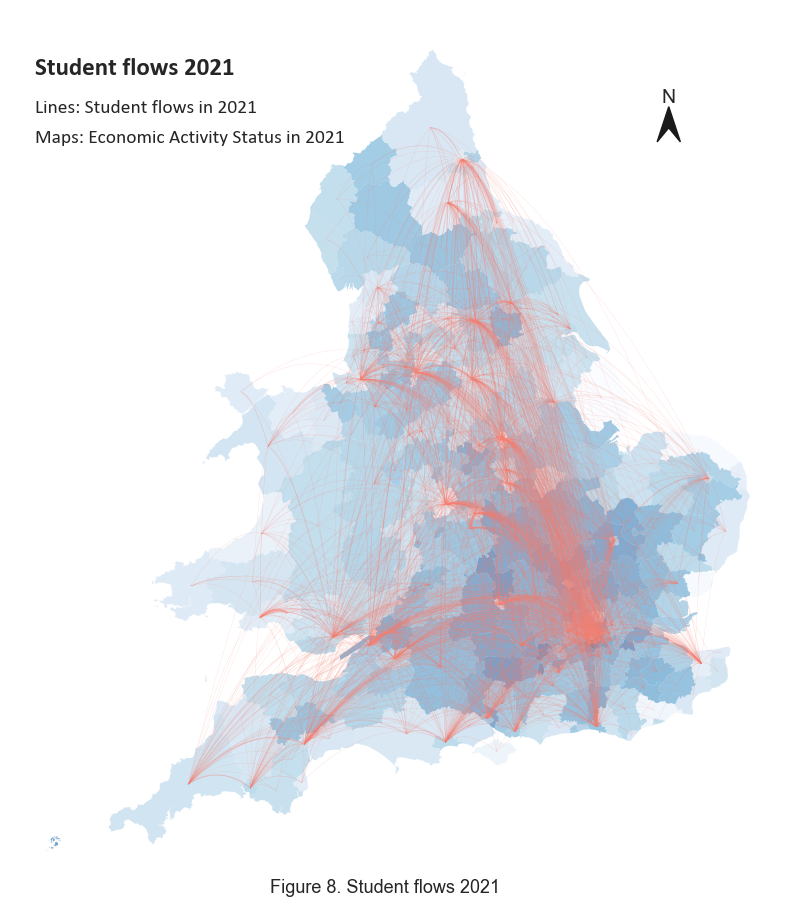

In [34]:
# Create figure and layout
fig, ax = plt.subplots(figsize=(10, 15))

# Plot the LTLA shapes
EAS_UK.plot(column='2021', ax=ax, cmap='Blues', edgecolor='none', legend=False, alpha=0.6)

# Create curve OD lines (ChatGPT used in this fuction)
# Function to calculate the distance between two points
def calculate_distance(p1, p2):
    return np.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)

# Plot each OD flow (ChatGPT used in this fuction)
for _, row in od.iterrows():
    if pd.notnull(row['origin_geometry']) and pd.notnull(row['destination_geometry']) and row['Count'] >= 10: # Restrcit the OD lines to make it clearly.
        start = row['origin_centroid']
        end = row['destination_centroid']
        distance = calculate_distance(start, end)

        # Adjust the control point offset based on distance
        offset = 20 + 0.4 * distance 
        control = [(start.x + end.x) / 2, (start.y + end.y) / 2 + offset]

        # Create and add the path
        path_data = [
            (Path.MOVETO, (start.x, start.y)),
            (Path.CURVE4, control),
            (Path.CURVE4, (end.x, end.y)),
            (Path.CURVE4, (end.x, end.y))
        ]
        codes, verts = zip(*path_data)
        path = Path(verts, codes)
        patch = PathPatch(path, facecolor='none', lw=0.1 + row['Count'] * 0.002, edgecolor='salmon', alpha=0.5)
        ax.add_patch(patch)


# Add north compass (code from web)
def add_north(ax, labelsize=14, loc_x=0.85, loc_y=0.99, width=0.03, height=0.04, pad=0.14):
    minx, maxx = ax.get_xlim()
    miny, maxy = ax.get_ylim()
    ylen = maxy - miny
    xlen = maxx - minx
    left = [minx + xlen*(loc_x - width*.5), miny + ylen*(loc_y - pad)]
    right = [minx + xlen*(loc_x + width*.5), miny + ylen*(loc_y - pad)]
    top = [minx + xlen*loc_x, miny + ylen*(loc_y - pad + height)]
    center = [minx + xlen*loc_x, left[1] + (top[1] - left[1])*.4]
    triangle = mpatches.Polygon([left, top, right, center], color='k')
    ax.text(s='N',
            x=minx + xlen*loc_x,
            y=miny + ylen*(loc_y - pad + height),
            fontsize=labelsize,
            horizontalalignment='center',
            verticalalignment='bottom')
    ax.add_patch(triangle)
ax = plt.gca()
add_north(ax)   


# Set the title
plt.figtext(0.25, 0.75, 'Student flows 2021', ha='center', va='center', fontsize=18, fontname='Calibri', fontweight='bold')
plt.figtext(0.15, 0.72, 'Lines: Student flows in 2021', fontsize=14, fontname='Calibri')
plt.figtext(0.15, 0.7, 'Maps: Economic Activity Status in 2021', fontsize=14, fontname='Calibri')
plt.figtext(0.5, 0.2, "Figure 8. Student flows 2021", ha="center", fontsize=13)

ax.axis('off')
plt.show()

### Spatial data visualisation analysis

This project leveraged boundary data from the UK Data Service and focusing on English Lower Tier Local Authorities, critically examines the relationship between economic activity status and student migration patterns in England and Wales. Employing Python for data processing, combined with geospatial analysis and advanced visualization techniques, the analysis identifies a statistically significant correlation between economic factors and student migration at the local authority level. Notably, this correlation exhibits spatial variability, as revealed through both Ordinary Least Squares (OLS) and Geographically Weighted Regression (GWR) models. The results indicate that areas with higher economic activity tend to attract more students, underscoring the influential role of regional economic health in shaping migration decisions. The use of spatial data visualization reveals the student migration pattern in England and Wales, with a marked discrepancy in student flow volumes between England and Wales. Cross-border flows that be seen in the visualisation between Wales and England are also notably sparse. These insights are crucial for urban planning and policy-making, particularly in regions with significant student populations. This project underscores the necessity of formulating targeted policies that bolster student mobility and foster economic growth. 

# 5. Conclusion
This project utilised boundary data for England from the UK Data Service and focusing on English Lower Tier Local Authorities, explored the interplay between economic activity status and student migration patterns in England and Wales. Through a comprehensive analysis employing Python libraries for data cleaning, geospatial analysis, and visualization, the study uncovered significant correlations between economic factors and student migration trends at a local authority level. Leveraging both Ordinary Least Squares (OLS) and Geographically Weighted Regression (GWR), this project reveals a significant correlation between economic factors and student migration, with notable spatial variability across different regions. Higher economic activity areas tend to draw more students, indicating the substantial role of economic health in influencing migration decisions. The research is further enriched by the use of sophisticated data visualization techniques, which effectively illustrate the spatial distribution and intensity of these trends, aiding in the interpretation and understanding of complex data. These findings highlight the importance of considering economic indicators in urban planning and policy-making, especially in areas with high student populations. The research emphasizes the need for targeted policies that support student mobility and economic development, while also acknowledging the limitations of the current data and suggesting avenues for more detailed future investigations. This study contributes to the broader understanding of the dynamics of student migration, offering insights that can inform both educational and economic strategies at local and national levels.

## References
<p><a href="https://borders.ukdataservice.ac.uk/">[1]</a>UK Data Service. “English Boundary datasets easy download” UK Data Service, 2022, https://borders.ukdataservice.ac.uk/easy_download.html.</p>

<p><a href="https://doi.org/10.1073/pnas.2217937120">[2]</a>Sanliturk, E., Zagheni, E., Dańko, M.J., Theile, T. and Akbaritabar, A., 2023. Global patterns of migration of scholars with economic development. Proceedings of the National Academy of Sciences, 120(4), p.e2217937120.</p>

<p><a href="https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/bulletins/economicactivitystatusenglandandwales/census2021">[3]</a>Office for National Statistics (ONS), released 8 December 2022, ONS website, statistical bulletin, Economic activity status, England and Wales: Census 2021</p>

<p><a href="https://wicid.ukdataservice.ac.uk/">[4]</a>UK Data Service. “Census Support: Flow Data
” UK Data Service, 2021, https://wicid.ukdataservice.ac.uk/.</p>

<p><a href="https://doi.org/10.1016/j.rse.2003.08.004">[5]</a>Foody, G.M., 2003. Geographical weighting as a further refinement to regression modelling: An example focused on the NDVI–rainfall relationship. Remote sensing of Environment, 88(3), pp.283-293.</p>

<p><a href="https://doi.org/10.1016/j.scs.2021.103431">[6]</a>Gao, Y., Zhao, J. and Han, L., 2022. Exploring the spatial heterogeneity of urban heat island effect and its relationship to block morphology with the geographically weighted regression model. Sustainable Cities and Society, 76, p.103431.</p>

<p><a href="https://www.sciencedirect.com/referencework/9780080449104/international-encyclopedia-of-human-geography">[7]</a>Kitchin, R. and Thrift, N., 2009. International encyclopedia of human geography. Elsevier.</p>

<p><a href="https://doi.org/10.5038/2375-0901.14.4.7">[8]</a>Wang, W., Attanucci, J.P. and Wilson, N.H., 2011. Bus passenger origin-destination estimation and related analyses using automated data collection systems. Journal of Public Transportation, 14(4), pp.131-150.</p>

<p><a href="https://doi.org/10.1016/j.jtrangeo.2020.102899">[9]</a>Barroso, J.M.F., Albuquerque-Oliveira, J.L. and Oliveira-Neto, F.M., 2020. Correlation analysis of day-to-day origin-destination flows and traffic volumes in urban networks. Journal of Transport Geography, 89, p.102899.</p>

<p><a href="https://doi.org/10.1016/j.tra.2022.08.006">[10]</a>Shuai, C., Shan, J., Bai, J., Lee, J., He, M. and Ouyang, X., 2022. Relationship analysis of short-term origin–destination prediction performance and spatiotemporal characteristics in urban rail transit. Transportation Research Part A: Policy and Practice, 164, pp.206-223.</p>
